In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from corr_lib import *

### Correlation matrix mean as the Frechet barycenter w.r.t 2-Wasserstein distance between centered Gaussian

Frechet barycenter of a family of measures $(\mu_l)_{l=1}^k$ with weights $(\lambda_l)_{l=1}^k$ in the $k$-simplex is defined as 
$$
\mu^* = \min_{\mu} \sum_{l=1}^k \lambda_l W_2^2(\mu, \mu_l).
$$

For discreate measures $\mu_l = \sum_{i=1}^n m^l_i \delta_{x_i}$ (typically empirical distributions), this can be solved by a linear program ($W_2$ itself being the result of a linear minimization problem):

$$
\begin{align}
\min & \sum_{l=1}^k \sum_{i,j=1}^n d(X_i, X_j)^2 \pi^l_{ij} \\
s.t & \sum_{j=1}^n \pi^l_{ij} = \mu^*_i, \\
& \sum_{i=1}^n \pi^l_{ij} = \mu^l_i, \\
& \pi^l_{ij} \geq 0.
\end{align}
$$

where $d(X_i, X_j)$ is the Euclidean distance between points in the cloud.

One can therefore define the "mean" correlation between two empirical correlation matrices as the correlation matrix of their Frechet barycenter. Similarly, using varying weights, one can define a geodesic path in the empirical correlation manifold.

In [2]:
N = 10
T = 100

# point cloud
X_corr = random_corr_matrix(N, id_mixing=0.3)
X = np.random.multivariate_normal(np.ones(N), X_corr, T)

# weights
normalize = lambda a: a/np.sum(a)
a = normalize(np.random.rand(T))
b = normalize(np.random.rand(T))

weights = np.stack([a, b], axis=1)

# correlation matrices
A = weighted_correlation(X, a)
B = weighted_correlation(X, b)

In [3]:
bar = empirical_frechet_barycenter(X, weights, eps_abs=1e-4, eps_rel=5e-4, verbose=False)
Kbar = weighted_correlation(X, bar)

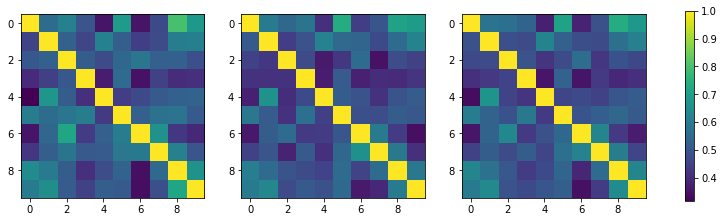

In [4]:
fig, axes = plt.subplots(figsize=(14, 7), nrows=1, ncols=3)
ax = axes[0]
im = ax.imshow(A)
clim=im.properties()['clim']

ax = axes[1]
ax.imshow(B, clim=clim)

ax = axes[2]
ax.imshow(Kbar, clim=clim)

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5)

plt.show()